In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import math


# Extract

In [2]:
df_2015 = pd.read_csv('../data/raw/2015.csv')
df_2016 = pd.read_csv('../data/raw/2016.csv')
df_2017 = pd.read_csv('../data/raw/2017.csv')
df_2018 = pd.read_csv('../data/raw/2018.csv')
df_2019 = pd.read_csv('../data/raw/2019.csv')
df = [df_2015, df_2016, df_2017, df_2018, df_2019]

for i in df:
    i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# Transform

In [3]:
for d in df:
    d["is_train"] = False
    train_idx, test_idx = train_test_split(d.index, test_size=0.3, random_state=42)
    d.loc[train_idx, "is_train"] = True

In [4]:
# Export df with train flag
for d, year in zip(df, range(2015, 2020)):
    output_path = f"../data/processed/{year}_with_flag.csv"
    d.to_csv(output_path, index=False)

In [5]:
for i, year in zip(df, range(2015, 2020)):
    i['year'] = year

## Rename

In [6]:
for i, year in zip(df, range(2015, 2020)):
    print(year)
    print(i.columns.tolist())
    

2015
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'is_train', 'year']
2016
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'is_train', 'year']
2017
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'is_train', 'year']
2018
['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'is_train', 'year']
2019
[

In [7]:
df_2019.rename(columns={'Country or region':'country_or_region',
                        'Overall rank': 'rank', 
                        'Score': 'score', 
                        'Social support': 'social_support',
                        'GDP per capita': 'gdp_per_capita',
                        'Healthy life expectancy': 'life_expectancy', 
                        'Freedom to make life choices': 'freedom', 
                        'Perceptions of corruption': 'perception_corruption', 
                        'Generosity': 'generosity',
                        }, inplace=True)

df_2018.rename(columns={'Country or region':'country_or_region',
                        'Overall rank': 'rank', 
                        'Score': 'score', 
                        'Social support': 'social_support',
                        'GDP per capita': 'gdp_per_capita',
                        'Healthy life expectancy': 'life_expectancy', 
                        'Freedom to make life choices': 'freedom', 
                        'Perceptions of corruption': 'perception_corruption', 
                        'Generosity': 'generosity',
                        }, inplace=True)

df_2017.rename(columns={'Country':'country',
                        'Happiness.Rank': 'rank', 
                        'Happiness.Score': 'score', 
                        'Whisker.high': 'whisker_high',
                        'Whisker.low': 'whisker_low',
                        'Economy..GDP.per.Capita.': 'gdp_per_capita',
                        'Family': 'family',
                        'Health..Life.Expectancy.': 'life_expectancy', 
                        'Freedom': 'freedom', 
                        'Trust..Government.Corruption.': 'perception_corruption', 
                        'Generosity': 'generosity',
                        'Dystopia.Residual': 'dystopia_residual',
                        }, inplace=True)

df_2016.rename(columns={'Country':'country',
                        'Region': 'region',
                        'Happiness Rank': 'rank', 
                        'Happiness Score': 'score', 
                        'Lower Confidence Interval': 'lower_IC',
                        'Upper Confidence Interval': 'upper_IC',
                        'Economy (GDP per Capita)': 'gdp_per_capita',
                        'Family': 'family',
                        'Health (Life Expectancy)': 'life_expectancy', 
                        'Freedom': 'freedom', 
                        'Trust (Government Corruption)': 'perception_corruption', 
                        'Generosity': 'generosity',
                        'Dystopia Residual': 'dystopia_residual',
                        }, inplace=True)

df_2015.rename(columns={'Country':'country',
                        'Region': 'region',
                        'Happiness Rank': 'rank', 
                        'Happiness Score': 'score', 
                        'Standard Error': 'std', 
                        'Economy (GDP per Capita)': 'gdp_per_capita',
                        'Family': 'family',
                        'Health (Life Expectancy)': 'life_expectancy', 
                        'Freedom': 'freedom', 
                        'Trust (Government Corruption)': 'perception_corruption', 
                        'Generosity': 'generosity',
                        'Dystopia Residual': 'dystopia_residual',
                        }, inplace=True)

df = [df_2015, df_2016, df_2017, df_2018, df_2019]

In [8]:
# Fill country or region with 'country or region'
known_countries = set(pd.concat([df_2015['country'], df_2016['country'], df_2017['country']]).dropna().unique())
known_regions = set(pd.concat([df_2015['region'], df_2016['region']]).dropna().unique())
def classify_by_reference(df):
    df['country'] = df['country_or_region'].apply(lambda x: x if x in known_countries else None)
    df['region'] = df['country_or_region'].apply(lambda x: x if x in known_regions else None)
    not_found = df[df['country'].isna() & df['region'].isna()].copy()
    return df, not_found

df_2018, not_found_2018 = classify_by_reference(df_2018)
df_2019, not_found_2019 = classify_by_reference(df_2019)

## Merge

In [9]:
df =pd.concat(df, ignore_index=True)
display(df)

,country,region,rank,score,std,gdp_per_capita,family,life_expectancy,freedom,perception_corruption,generosity,dystopia_residual,is_train,year,lower_IC,upper_IC,whisker_high,whisker_low,country_or_region,social_support
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,True,2015,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,True,2015,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,True,2015,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,True,2015,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,True,2015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,None,152,3.334,NaN,0.35900,NaN,0.61400,0.55500,0.41100,0.21700,NaN,True,2019,NaN,NaN,NaN,NaN,Rwanda,0.711
778,Tanzania,None,153,3.231,NaN,0.47600,NaN,0.49900,0.41700,0.14700,0.27600,NaN,False,2019,NaN,NaN,NaN,NaN,Tanzania,0.885
779,Afghanistan,None,154,3.203,NaN,0.35000,NaN,0.36100,0.00000,0.02500,0.15800,NaN,True,2019,NaN,NaN,NaN,NaN,Afghanistan,0.517
780,Central African Republic,None,155,3.083,NaN,0.02600,NaN,0.10500,0.22500,0.03500,0.23500,NaN,True,2019,NaN,NaN,NaN,NaN,Central African Republic,0.000


## Fill 'region' null

In [10]:
# Fill region with region from others rows
map_region = (df.dropna(subset=["region"]).drop_duplicates(subset=["country"], keep="first").set_index("country")["region"].to_dict())

df["region"] = df["region"].fillna(df["country"].map(map_region))

In [11]:
display(df[df['region'].isna()])
print(df['region'].unique())
# Fill with 'country or region'
df['country'] = df['country'].fillna(df['country_or_region'])
# Fill with dictionary
manual_regions = {
    'Taiwan Province of China': 'Eastern Asia',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Middle East and Northern Africa',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa'
}

df['region'] = df['region'].fillna(df['country'].map(manual_regions))
display(df[df['region'].isna()])

,country,region,rank,score,std,gdp_per_capita,family,life_expectancy,freedom,perception_corruption,generosity,dystopia_residual,is_train,year,lower_IC,upper_IC,whisker_high,whisker_low,country_or_region,social_support
347,Taiwan Province of China,NaN,33,6.422,NaN,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2.126607,True,2017,NaN,NaN,6.494596,6.349404,NaN,NaN
385,"Hong Kong S.A.R., China",NaN,71,5.472,NaN,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,0.554633,True,2017,NaN,NaN,5.549594,5.394406,NaN,NaN
507,None,NaN,38,6.192,NaN,1.223000,NaN,0.564000,0.575000,0.019000,0.171000,NaN,True,2018,NaN,NaN,NaN,NaN,Trinidad & Tobago,1.492
527,None,NaN,58,5.835,NaN,1.229000,NaN,0.909000,0.495000,0.154000,0.179000,NaN,True,2018,NaN,NaN,NaN,NaN,Northern Cyprus,1.211
664,None,NaN,39,6.192,NaN,1.231000,NaN,0.713000,0.489000,0.016000,0.185000,NaN,True,2019,NaN,NaN,NaN,NaN,Trinidad & Tobago,1.477
689,None,NaN,64,5.718,NaN,1.263000,NaN,1.042000,0.417000,0.162000,0.191000,NaN,True,2019,NaN,NaN,NaN,NaN,Northern Cyprus,1.252
709,None,NaN,84,5.274,NaN,0.983000,NaN,0.838000,0.345000,0.034000,0.185000,NaN,True,2019,NaN,NaN,NaN,NaN,North Macedonia,1.294
745,None,NaN,120,4.516,NaN,0.308000,NaN,0.428000,0.382000,0.167000,0.269000,NaN,False,2019,NaN,NaN,NaN,NaN,Gambia,0.939


['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia' nan]


,country,region,rank,score,std,gdp_per_capita,family,life_expectancy,freedom,perception_corruption,generosity,dystopia_residual,is_train,year,lower_IC,upper_IC,whisker_high,whisker_low,country_or_region,social_support


In [12]:
df.isna().sum()[df.isna().sum() > 0]

std                      624
family                   312
perception_corruption      1
dystopia_residual        312
lower_IC                 625
upper_IC                 625
whisker_high             627
whisker_low              627
country_or_region        470
social_support           470
dtype: int64

## Null manage

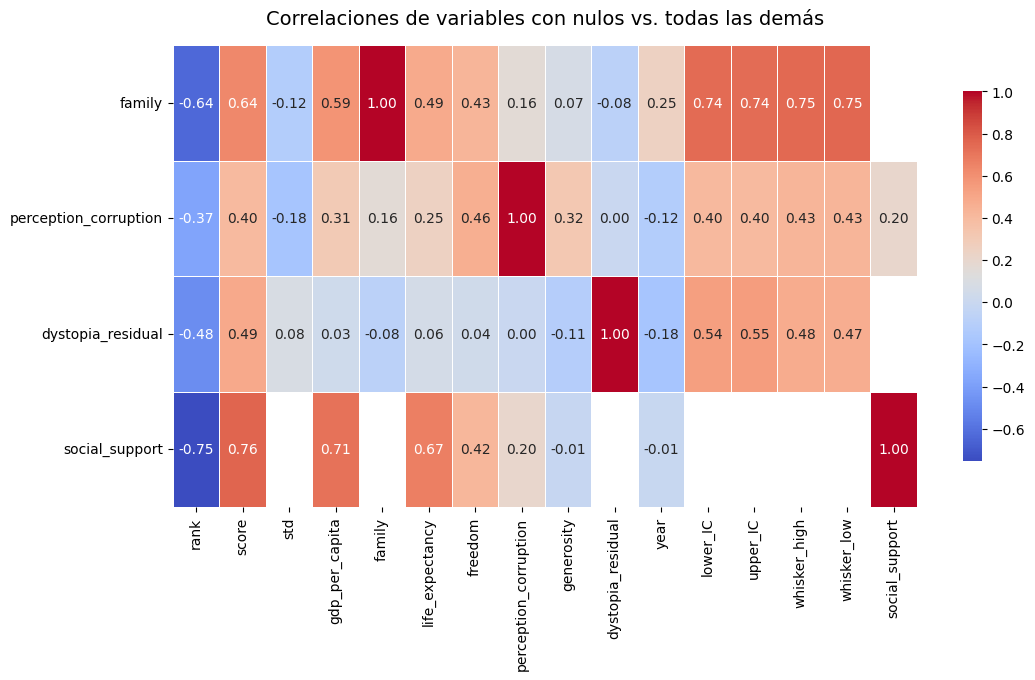

In [13]:
num_cols = df.select_dtypes(include=['float64', 'int64'])
cols_with_nulls = ['family', 'perception_corruption', 'dystopia_residual', 'social_support']

corr_matrix = num_cols.corr()
corr_focus = corr_matrix.loc[cols_with_nulls, :]

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_focus,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlaciones de variables con nulos vs. todas las demás", fontsize=14, pad=15)
plt.show()

In [14]:
df_reg = df[cols_with_nulls + ['score', 'rank', 'gdp_per_capita', 'life_expectancy', 'freedom', 'generosity', 'lower_IC', 'upper_IC']].copy()

predictors = {
    'dystopia_residual': ['score', 'gdp_per_capita', 'life_expectancy', 'freedom'],
    'social_support': ['score', 'rank', 'gdp_per_capita', 'freedom', 'life_expectancy'],
    'perception_corruption': ['score', 'generosity', 'freedom', 'gdp_per_capita'],
    'family': ['score', 'gdp_per_capita', 'life_expectancy', 'freedom'] 
}

for target, features in predictors.items():
    train_data = df_reg.dropna(subset=[target] + features)
    if len(train_data) == 0:
        print(f"{target}: sin datos suficientes para imputar")
        continue
    
    X_train = train_data[features]
    y_train = train_data[target]
    model = LinearRegression().fit(X_train, y_train)
    
    missing_mask = df_reg[target].isna()
    if missing_mask.sum() == 0:
        continue
    X_pred = df_reg.loc[missing_mask, features]
    df_reg.loc[missing_mask, target] = model.predict(X_pred)
    
    print(f"'{target}' imputado ({missing_mask.sum()} valores) usando {features}")

knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(
    knn_imputer.fit_transform(num_cols),
    columns=num_cols.columns,
    index=num_cols.index
)

# kNN
knn_imputer = KNNImputer(n_neighbors=5)

df_knn = pd.DataFrame(knn_imputer.fit_transform(num_cols), columns=num_cols.columns, index=num_cols.index)

'dystopia_residual' imputado (312 valores) usando ['score', 'gdp_per_capita', 'life_expectancy', 'freedom']
'social_support' imputado (470 valores) usando ['score', 'rank', 'gdp_per_capita', 'freedom', 'life_expectancy']
'perception_corruption' imputado (1 valores) usando ['score', 'generosity', 'freedom', 'gdp_per_capita']
'family' imputado (312 valores) usando ['score', 'gdp_per_capita', 'life_expectancy', 'freedom']


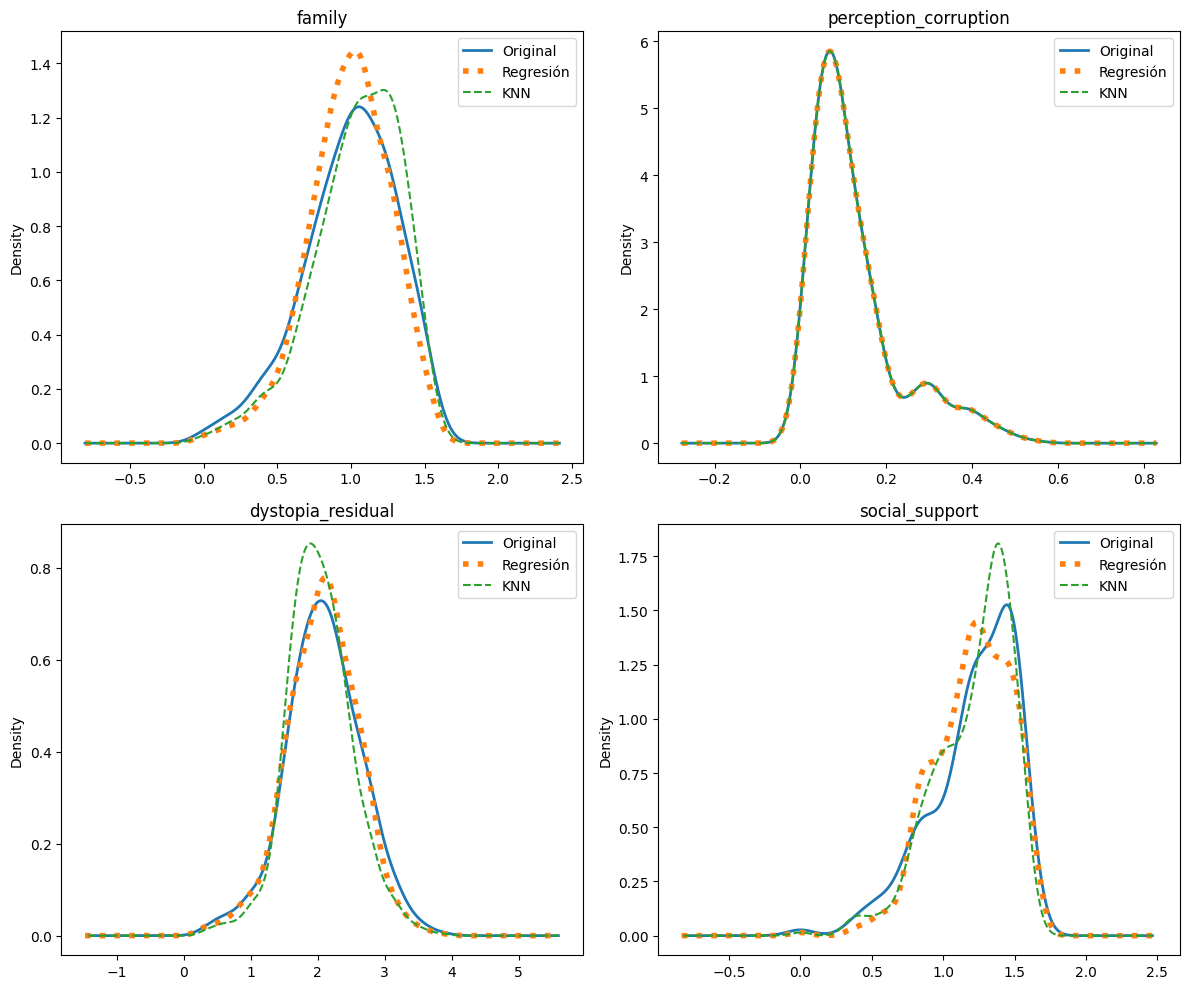

In [15]:
reg_imputed_cols = [col for col in cols_with_nulls if df_reg[col].isna().sum() < df[col].isna().sum()]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols_with_nulls):
    ax = axes[i]
    orig = df[col].dropna()
    knn_imp = df_knn[col]
    
    orig.plot(kind='kde', ax=ax, label='Original', linewidth=2)
    if col in reg_imputed_cols:
        df_reg[col].plot(kind='kde', ax=ax, label='Regresión', linestyle=':', linewidth=4)
    knn_imp.plot(kind='kde', ax=ax, label='KNN', linestyle='--')
    
    ax.set_title(col, fontsize=12)
    ax.legend()

plt.tight_layout()
plt.show()

In [16]:
predictors = {
    'dystopia_residual': ['score', 'gdp_per_capita', 'life_expectancy', 'freedom'],
    'social_support': ['score', 'rank', 'gdp_per_capita', 'freedom', 'life_expectancy'],
    'perception_corruption': ['score', 'generosity', 'freedom', 'gdp_per_capita'],
    'family': ['score', 'gdp_per_capita', 'life_expectancy', 'freedom'] 
}

for target, features in predictors.items():
    missing_mask = df[target].isna()
    if missing_mask.sum() == 0:
        continue
    train_data = df.dropna(subset=[target] + features)
    model = LinearRegression().fit(train_data[features], train_data[target])
    X_pred = df.loc[missing_mask, features].dropna()
    df.loc[X_pred.index, target] = model.predict(X_pred)
    

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                782 non-null    object 
 1   region                 782 non-null    object 
 2   rank                   782 non-null    int64  
 3   score                  782 non-null    float64
 4   std                    158 non-null    float64
 5   gdp_per_capita         782 non-null    float64
 6   family                 782 non-null    float64
 7   life_expectancy        782 non-null    float64
 8   freedom                782 non-null    float64
 9   perception_corruption  782 non-null    float64
 10  generosity             782 non-null    float64
 11  dystopia_residual      782 non-null    float64
 12  is_train               782 non-null    bool   
 13  year                   782 non-null    int64  
 14  lower_IC               157 non-null    float64
 15  upper_

# EDA

## Univariate analysis

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,782.0,78.698210,45.182384,1.000000,40.000000,79.000000,118.000000,158.000000
score,782.0,5.379018,1.127456,2.693000,4.509750,5.322000,6.189500,7.769000
std,158.0,0.047885,0.017146,0.018480,0.037268,0.043940,0.052300,0.136930
gdp_per_capita,782.0,0.916047,0.407340,0.000000,0.606500,0.982205,1.236187,2.096000
family,782.0,0.986341,0.278678,0.000000,0.812735,1.005791,1.183549,1.610574
life_expectancy,782.0,0.612416,0.248309,0.000000,0.440183,0.647310,0.808000,1.141000
freedom,782.0,0.411091,0.152880,0.000000,0.309768,0.431000,0.531000,0.724000
perception_corruption,782.0,0.125461,0.105751,0.000000,0.054250,0.091033,0.155861,0.551910
generosity,782.0,0.218576,0.122321,0.000000,0.130000,0.201982,0.278832,0.838075
dystopia_residual,782.0,2.069509,0.533855,0.297213,1.722973,2.094640,2.442502,3.837720


In [19]:
df.describe(include='object').T

,count,unique,top,freq
country,782,170,Switzerland,5
region,782,10,Sub-Saharan Africa,196
country_or_region,312,160,Finland,2


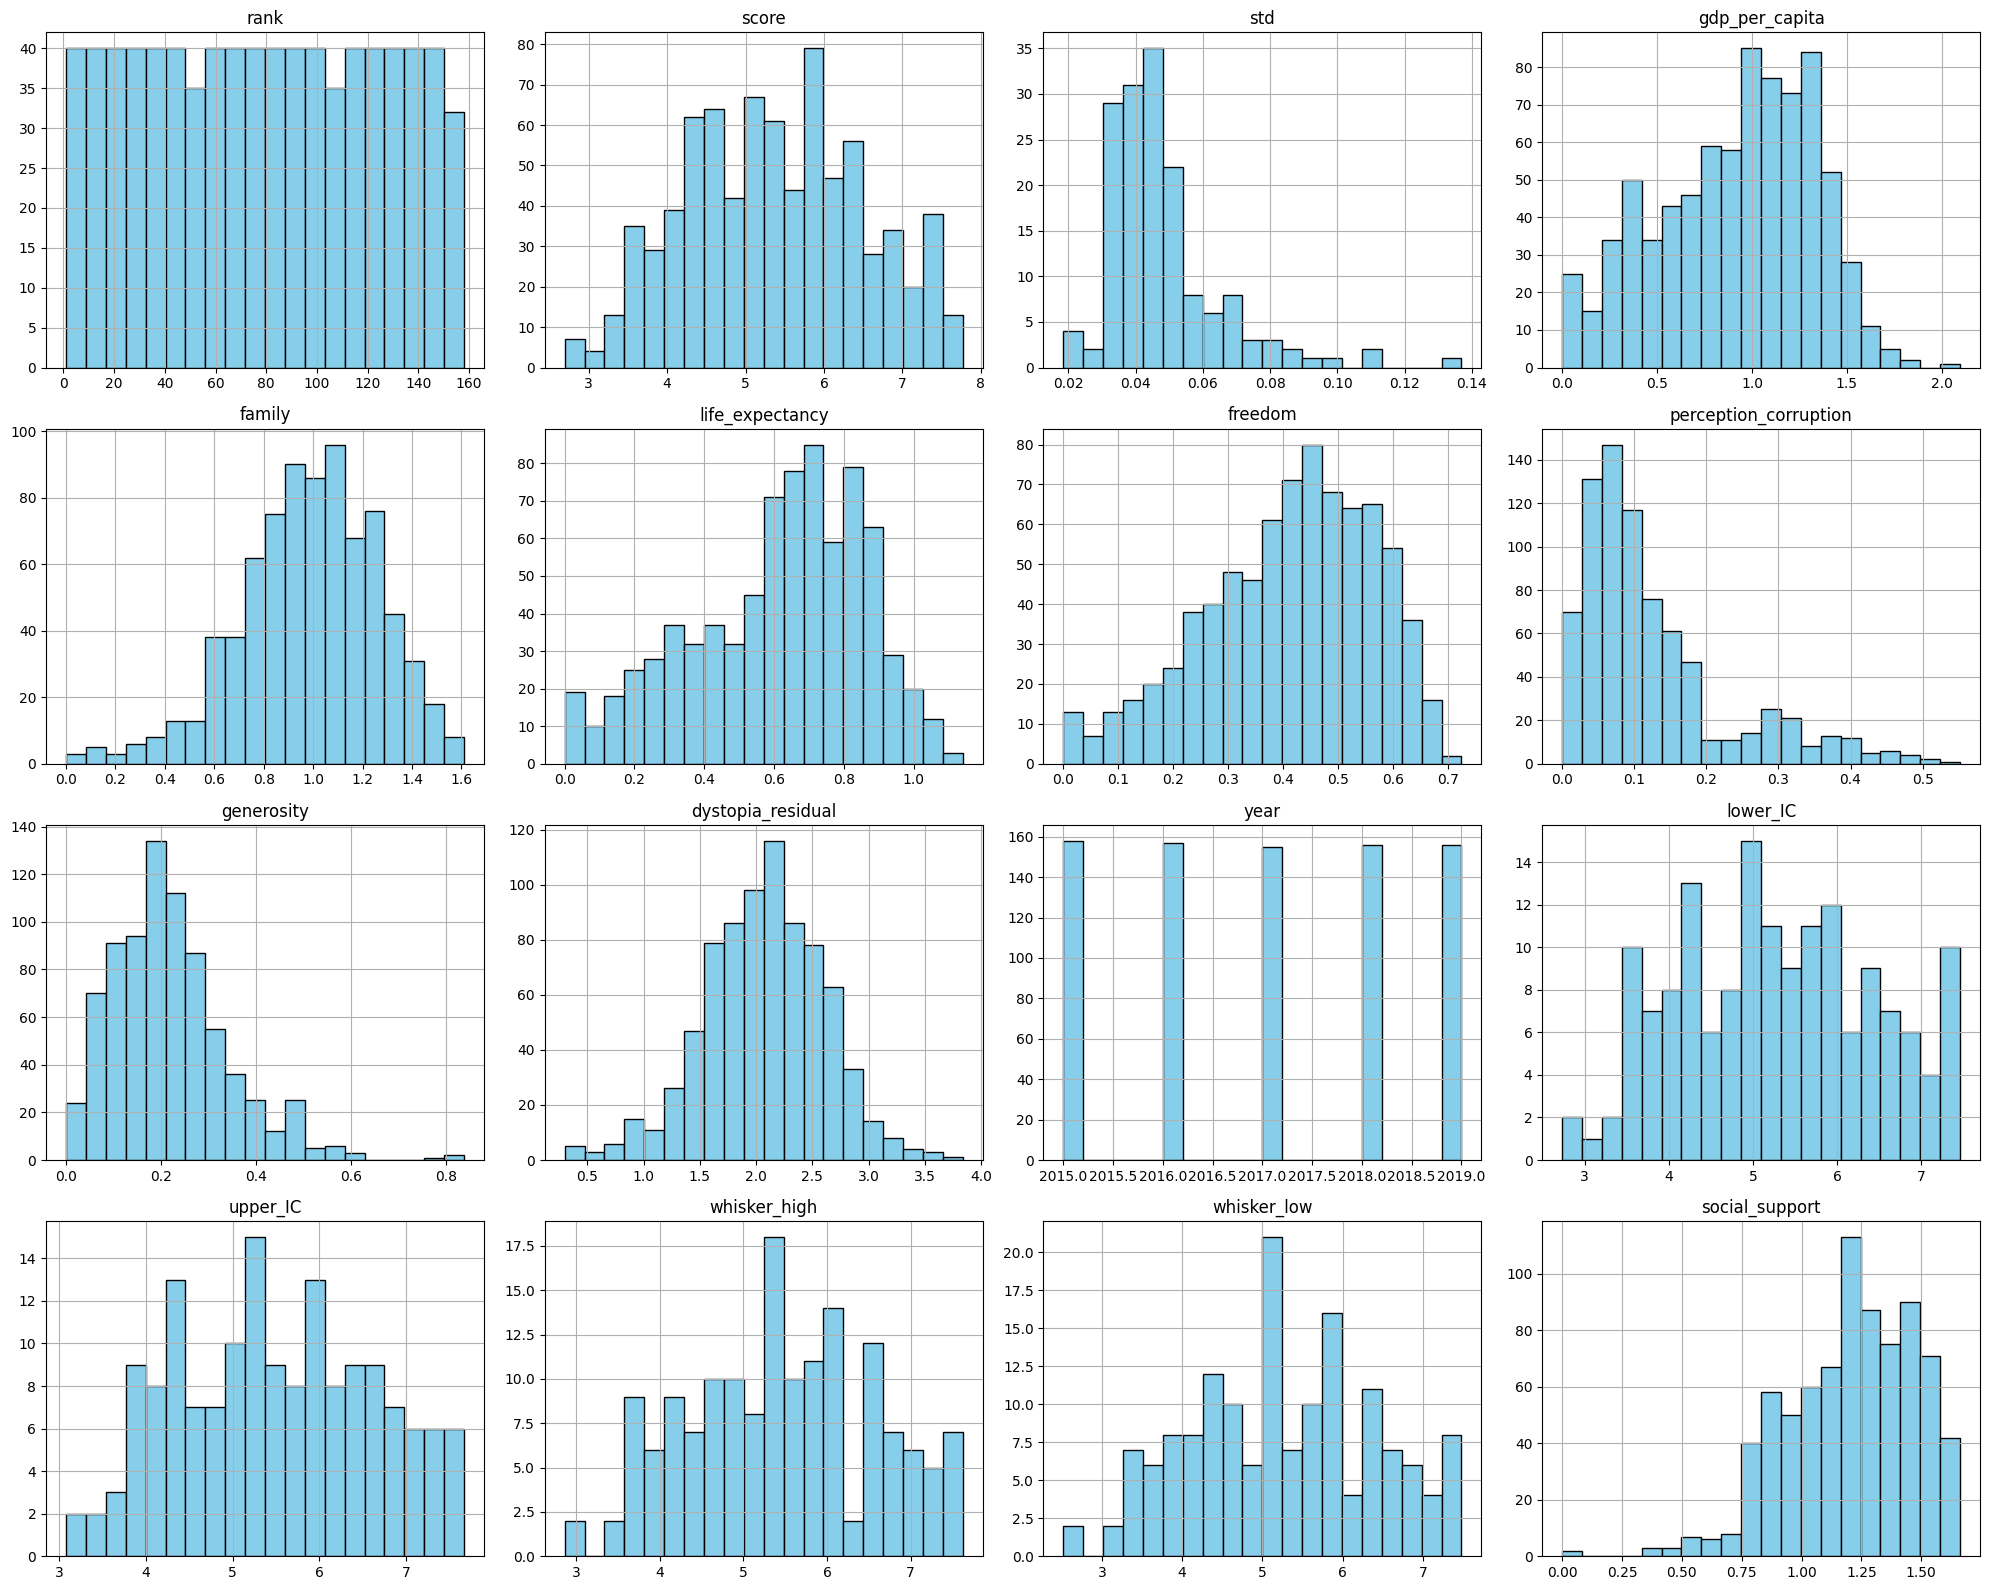

In [20]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = len(num_cols)

cols = 4
rows = math.ceil(n_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    ax = axes[i]
    df[col].hist(bins=20, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Bivariate analysis

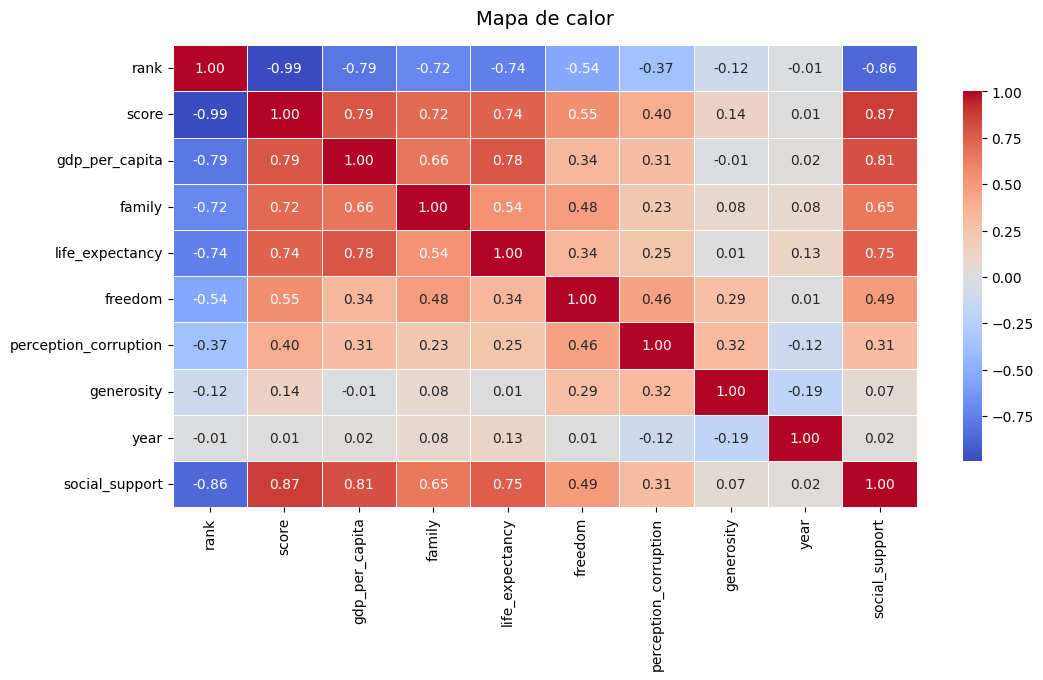

In [21]:
num_cols = df.select_dtypes(include=['float64', 'int64'])
exclude_cols = ['std', 'lower_IC', 'upper_IC', 'whisker_high', 'whisker_low', 'dystopia_residual']
num_corr = num_cols.drop(columns=[c for c in exclude_cols if c in num_cols.columns])

corr_matrix = num_corr.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Mapa de calor", fontsize=14, pad=15)
plt.show()

## Feature Selection

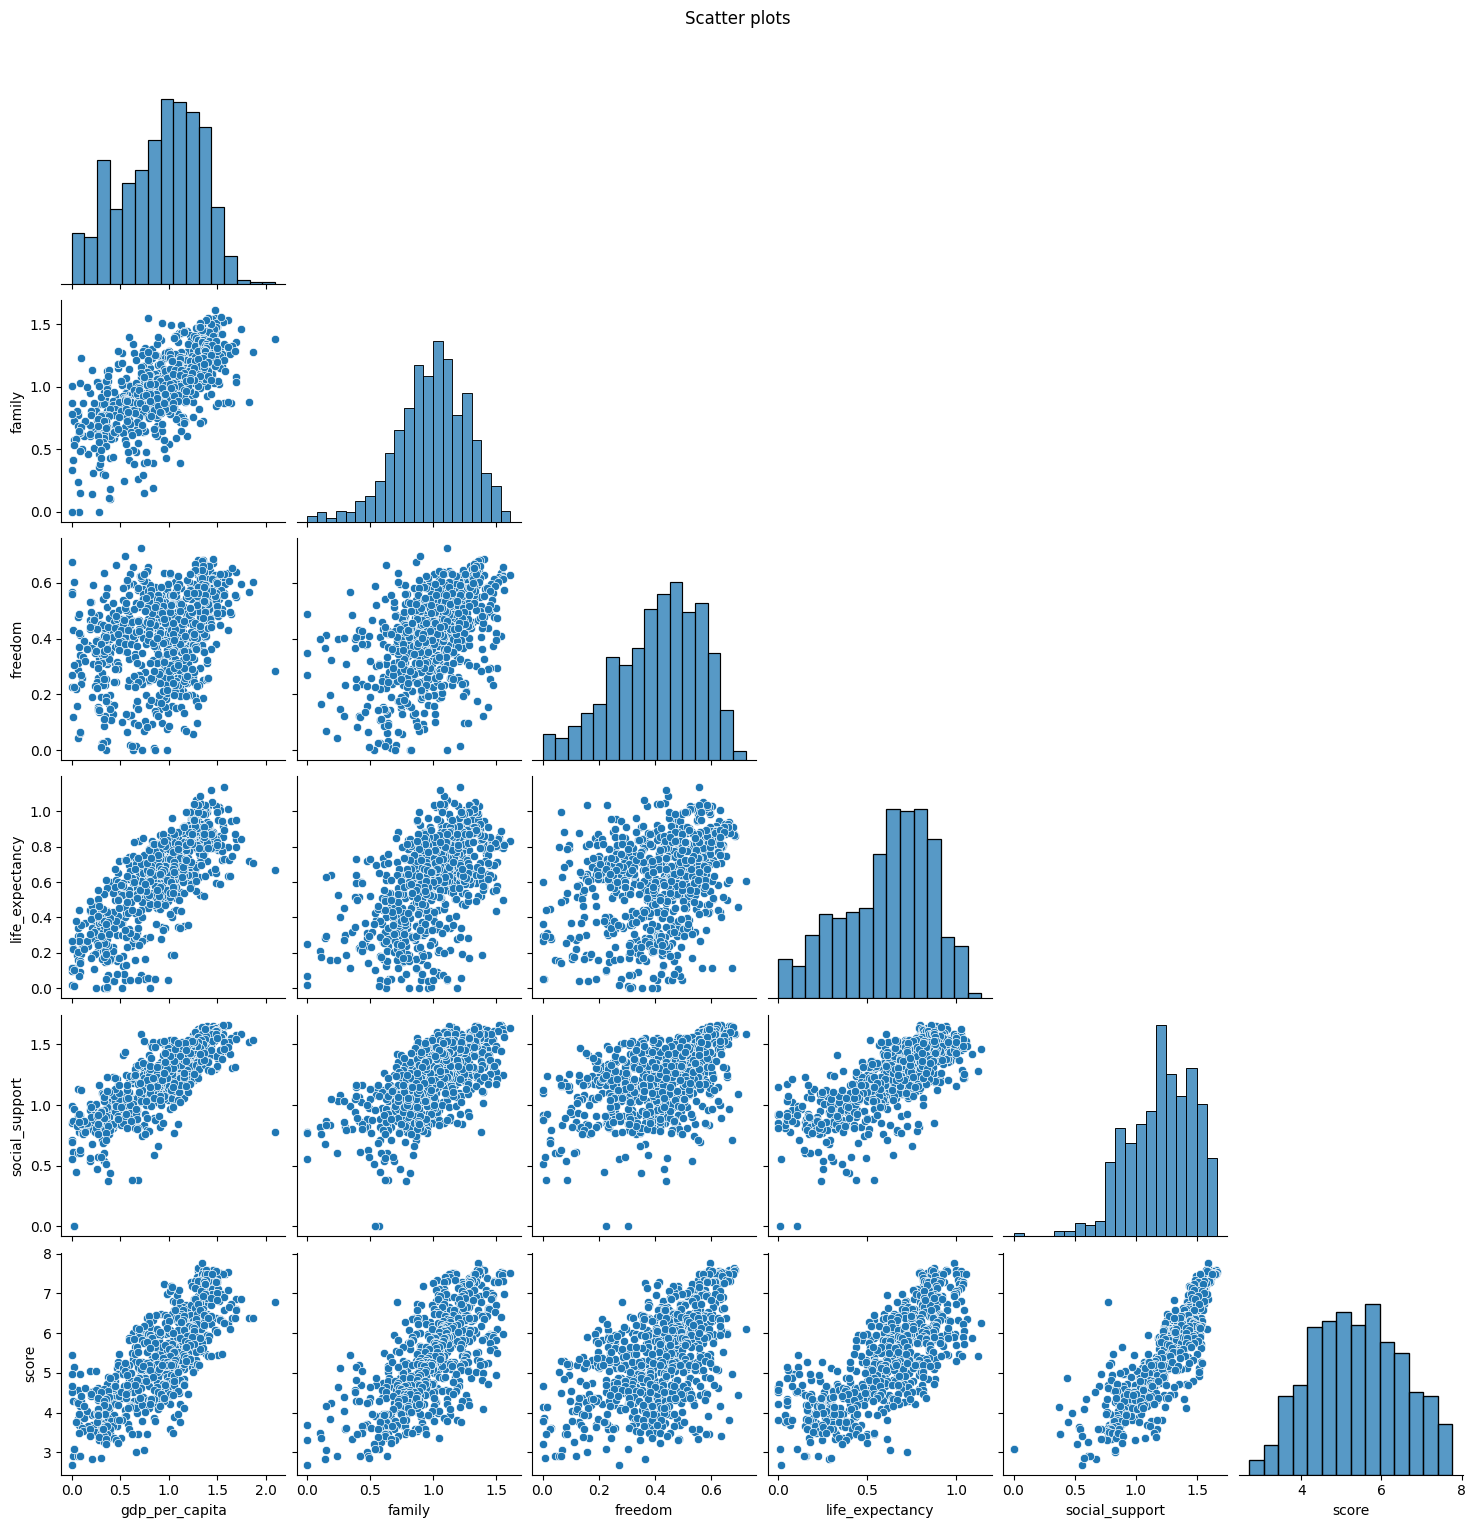

In [22]:
features = ['gdp_per_capita', 'family', 'freedom', 'life_expectancy', 'social_support', 'score']

df_plot = df[features].copy().dropna()
sns.pairplot(df_plot, kind='scatter', corner=True)

plt.suptitle("Scatter plots", y=1.02)
plt.show()

# Model Training

## VIF for Multicolinearity

In [23]:
X_full = df[['gdp_per_capita', 'family', 'freedom', 'life_expectancy', 'social_support']].dropna()
vif_data = pd.DataFrame()
vif_data["Variable"] = X_full.columns
vif_data["VIF"] = [variance_inflation_factor(X_full.values, i) for i in range(X_full.shape[1])]
display(vif_data.sort_values('VIF', ascending=False))

,Variable,VIF
4,social_support,43.622770
1,family,26.175720
3,life_expectancy,20.537147
0,gdp_per_capita,20.414279
2,freedom,11.961291


## PCA Analysis

In [24]:
features_pca = ['gdp_per_capita', 'family', 'freedom', 'life_expectancy', 'social_support']
df_pca = df[features_pca].dropna()
y_pca = df.loc[df_pca.index, 'score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print('PCA')
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%) - Cumulative: {cum_var:.4f} ({cum_var*100:.2f}%)")

PCA
PC1: 0.6782 (67.82%) - Cumulative: 0.6782 (67.82%)
PC2: 0.1572 (15.72%) - Cumulative: 0.8354 (83.54%)
PC3: 0.0871 (8.71%) - Cumulative: 0.9225 (92.25%)
PC4: 0.0446 (4.46%) - Cumulative: 0.9672 (96.72%)
PC5: 0.0328 (3.28%) - Cumulative: 1.0000 (100.00%)


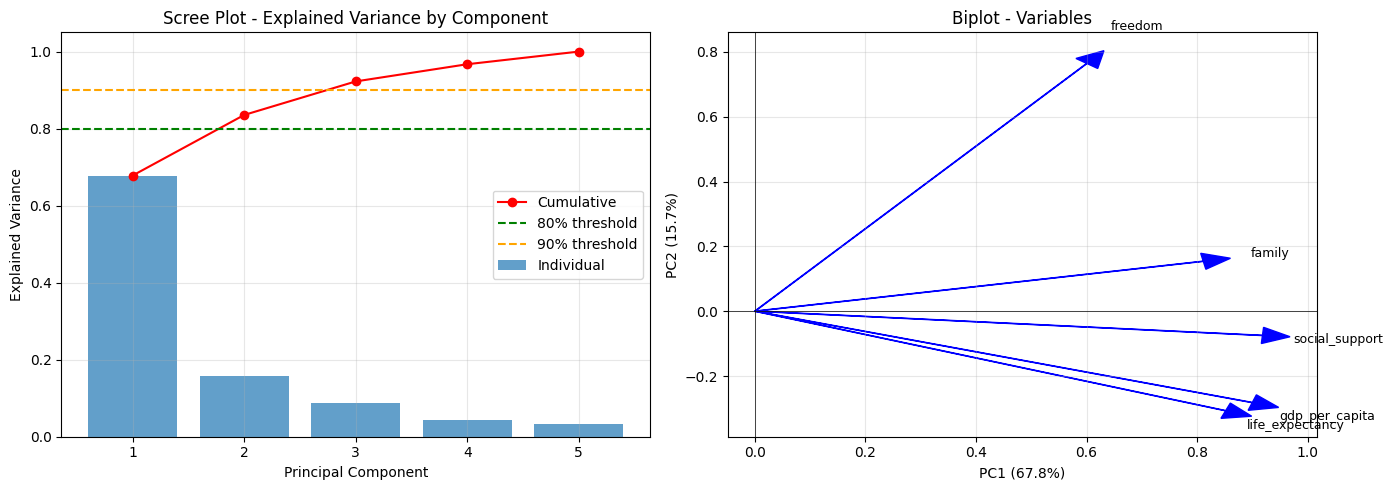

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Individual')
axes[0].plot(range(1, len(explained_variance)+1), cumulative_variance, 'ro-', label='Cumulative')
axes[0].axhline(y=0.8, color='g', linestyle='--', label='80% threshold')
axes[0].axhline(y=0.9, color='orange', linestyle='--', label='90% threshold')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance')
axes[0].set_title('Scree Plot - Explained Variance by Component')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

loadings = pca.components_[:2].T * np.sqrt(pca.explained_variance_[:2])
for i, feature in enumerate(features_pca):
    axes[1].arrow(0, 0, loadings[i, 0], loadings[i, 1], 
                  head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    axes[1].text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, 
                 ha='center', va='center', fontsize=9)
axes[1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)')
axes[1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)')
axes[1].set_title('Biplot - Variables')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

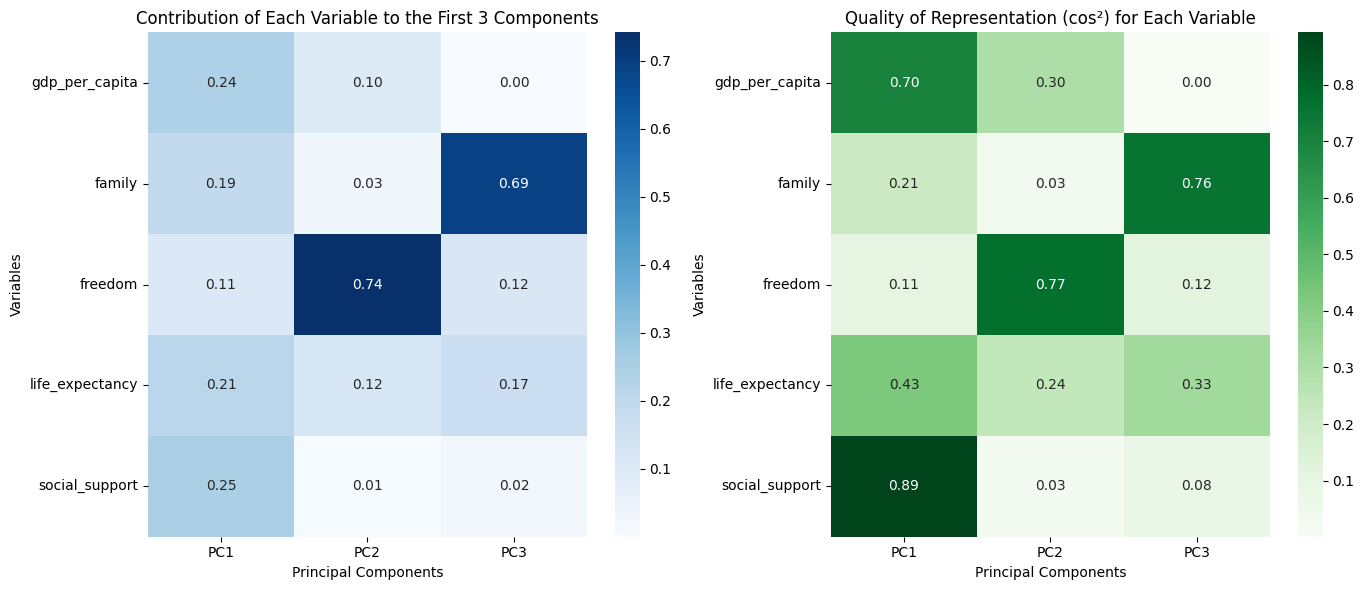

In [26]:
loadings_matrix = pca.components_[:3, :]
loadings_df = pd.DataFrame(loadings_matrix.T, 
                           index=features_pca, 
                           columns=['PC1', 'PC2', 'PC3'])

contrib = loadings_df**2

cos2 = contrib.div(contrib.sum(axis=1), axis=0)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(contrib, annot=True, cmap="Blues", fmt=".2f", ax=ax[0])
ax[0].set_title("Contribution of Each Variable to the First 3 Components")
ax[0].set_xlabel("Principal Components")
ax[0].set_ylabel("Variables")

sns.heatmap(cos2, annot=True, cmap="Greens", fmt=".2f", ax=ax[1])
ax[1].set_title("Quality of Representation (cos²) for Each Variable")
ax[1].set_xlabel("Principal Components")
ax[1].set_ylabel("Variables")

plt.tight_layout()
plt.show()

**PCA Components**
- **PC1**: Social and Economic Prosperity
- **PC2**: Freedom
- **PC3**: Family

## Model Election

In [27]:
pca_final = PCA(n_components=3)
X_pca_final = pca_final.fit_transform(X_scaled)

df_pca_final = df.loc[df_pca.index].copy()
df_pca_final["is_train"] = df.loc[df_pca.index, "is_train"]

X_train_pca = X_pca_final[df_pca_final["is_train"] == True]
X_test_pca = X_pca_final[df_pca_final["is_train"] == False]
y_train_pca = y_pca[df_pca_final["is_train"] == True]
y_test_pca = y_pca[df_pca_final["is_train"] == False]

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

r2_pca = metrics.r2_score(y_test_pca, y_pred_pca)
mae_pca = metrics.mean_absolute_error(y_test_pca, y_pred_pca)
rmse_pca = np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_pca))

print(f'R² = {r2_pca:.4f}')
print(f'MAE = {mae_pca:.4f}')
print(f'RMSE = {rmse_pca:.4f}')

R² = 0.7811
MAE = 0.3924
RMSE = 0.4989


## Export

In [28]:
pca_package = {
    'model': model_pca,
    'pca': pca_final,
    'scaler': scaler,
    'features': features_pca
}

with open("../models/happiness_score_pca_model.pkl", "wb") as f:
    pickle.dump(pca_package, f)